In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy
from scipy.integrate import solve_ivp
from numpy import genfromtxt
from scipy.integrate import quad

datPath = '/data/out/'

In [2]:
def SI(t,y,param):
    mu, beta, kappa, sigma, N = param
    I = y
    dIdt = beta*I*(N-I) / N + kappa * (N-I) - (mu + sigma)*I
    return [dIdt]

In [3]:
def SIS(t,y,param):
    mu, beta, kappa, sigma, N = param
    S, I = y
    dSdt = mu*N - mu*S - beta*I*S / N - kappa * S + sigma*I
    dIdt = beta*I*S / N + kappa * S - mu*I - sigma*I
    return [dSdt,dIdt]

In [4]:
def SIR(t,y,param):
    mu, beta, kappa, sigma, N = param
    S, I, R = y
    dSdt = mu*N - mu*S - beta*I*S / N - kappa * S
    dIdt = beta*I*S / N + kappa * S - mu*I - sigma*I
    dRdt = sigma*I - mu*R
    return [dSdt,dIdt,dRdt]

In [60]:
def SEIR(t,y,param):
    mu, beta, kappa, sigma, N = param
    S, E, I, R = y
    dSdt = mu*N - mu*S - beta*I*S / N - kappa * S
    dEdt = beta*I*S / N + kappa * S - (1/3)*E - mu*E
    dIdt = (1/3)*E - mu*I - sigma*I
    dRdt = sigma*I - mu*R
    return [dSdt,dEdt,dIdt,dRdt]

In [61]:
# make sample list of kappa values
kappa_list = 10.0 ** (np.linspace(-7,-4,30))
# make sample list of N values
N_list = 10.0 ** (np.linspace(2,5,30))

# kappa_list = kappa_list[-5:-1]
# N_list = N_list[-5:-1]
t_points = np.linspace(0,50000,51)

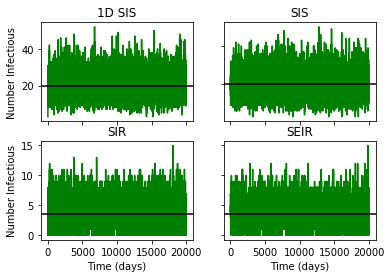

In [79]:
def plotCompareGrid(kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname_SI = 'SI' + 'k_keq_' + ku + '_Neq_' +  Nu
    flname_SIS = 'SIS' + 'k_keq_' + ku + '_Neq_' +  Nu
    flname_SIR = 'SIR' + 'k_keq_' + ku + '_Neq_' +  Nu
    flname_SEIR = 'SEIR' + 'k_keq_' + ku + '_Neq_' +  Nu
    
    
    # load the sim-data
    simdat_SI = genfromtxt('.' + datPath + 'SI' + '/' + flname_SI, delimiter=',')
    simdat_SIS = genfromtxt('.' + datPath + 'SIS' + '/' + flname_SIS, delimiter=',')
    simdat_SIR = genfromtxt('.' + datPath + 'SIR' + '/' + flname_SIR, delimiter=',')
    simdat_SEIR = genfromtxt('.' + datPath + 'SEIR' + '/' + flname_SEIR, delimiter=',')

    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])
    tend = t_points[-1]
    
    ic_SI = np.array([0])
    sol_SI = solve_ivp(lambda t, y: SI(t, y, param),
                     (0, tend),
                     ic_SI,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)
    
    ic_SIS = np.array([N,0])
    sol_SIS = solve_ivp(lambda t, y: SIS(t, y, param),
                     (0, tend),
                     ic_SIS,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)
    
    ic_SIR = np.array([N,0,0])
    sol_SIR = solve_ivp(lambda t, y: SIR(t, y, param),
                     (0, tend),
                     ic_SIR,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)
    
    ic_SEIR = np.array([N,0,0,0])
    sol_SEIR = solve_ivp(lambda t, y: SEIR(t, y, param),
                     (0, tend),
                     ic_SEIR,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)
    
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(simdat_SI[:,0],simdat_SI[:,1],'g-')
    axs[0, 0].axhline(y = sol_SI.y[0][-1], color='k', linestyle='-')
    axs[0, 0].set_title('1D SIS')
    
    axs[0, 1].plot(simdat_SIS[:,0],simdat_SIS[:,1],'g-')
    axs[0, 1].axhline(y = sol_SIS.y[1][-1], color='k', linestyle='-')
    axs[0, 1].set_title('SIS')
    
    axs[1, 0].plot(simdat_SIR[:,0],simdat_SIR[:,1],'g-')
    axs[1, 0].axhline(y = sol_SIR.y[1][-1], color='k', linestyle='-')
    axs[1, 0].set_title('SIR')
    
    axs[1, 1].plot(simdat_SEIR[:,0],simdat_SEIR[:,1],'g-')
    axs[1, 1].axhline(y = sol_SEIR.y[2][-1], color='k', linestyle='-')
    axs[1, 1].set_title('SEIR')

    for ax in axs.flat:
        ax.set(xlabel='Time (days)', ylabel='Number Infectious')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()


plotCompareGrid(kappa_list[29],N_list[29])

plt.savefig('Deterministic_Stoch_Compare.pdf', bbox_inches="tight")

# Exploratory Work Below
#...


## plotBoth function for SEIR

In [7]:
def plotBoth(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    flname2 = 'SI' + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt('.' + datPath + mdl_name + '/' + flname, delimiter=',')
    simdat2 = genfromtxt('.' + datPath + 'SI' + '/' + flname2, delimiter=',')

    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])

    ic_util = np.array([N,0,0,0])
    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SEIR(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)

    ic_util = np.array([0])
    tend=t_points[-1]
    sol2 = solve_ivp(lambda t, y: SI(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-4,
                     rtol = 1e-4)

#     plt.plot(sol1.t, sol1.y[2][:],'k-')
    plt.plot(simdat[:,0],simdat[:,1],'g-')
    plt.plot(simdat2[:,0],simdat2[:,1],'g-')
    plt.axhline(y=sol1.y[2][-1], color='b', linestyle='-')
    plt.axhline(y=sol2.y[0][-1], color='k', linestyle='-')
#     plt.plot(sol1.t,sol1.y[2], color='b', linestyle='-')
#     plt.plot(sol2.t,sol2.y[0], color='k', linestyle='-')



    plt.axis([0, 2000, 0, 40])



## 1DSIS and SEIR - Deterministic vs Stochastic
1. Note that the deterministic solver reached equilibrium, and that equilibrium value is being shown, not an actual calculated time series. Uncomment code above to see the time series.
1. SEIR is observed to appear stationary for ten times this time scale, again uncomment code above to see longer time series for SEIR.

In [ ]:
print(kappa_list[-1])
print(N_list[-1])
plotBoth('SEIR',kappa_list[-1],N_list[-1])

## plotBoth function for SIR
...
Note: It is easier to copy and paste the above function and change some indexes then to make completely generalized function. The biggest change has to do with indexing to make sure that we are plotting the infectious class.

In [38]:
def plotBoth(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    flname2 = 'SI' + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt('.' + datPath + mdl_name + '/' + flname, delimiter=',')
    simdat2 = genfromtxt('.' + datPath + 'SI' + '/' + flname2, delimiter=',')

    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])

    ic_util = np.array([N,0,0])
    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SIR(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)

    ic_util = np.array([0])
    sol2 = solve_ivp(lambda t, y: SI(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-4,
                     rtol = 1e-4)

    plt.plot(simdat[:,0],simdat[:,1],'g-')
    plt.plot(simdat2[:,0],simdat2[:,1],'b-')
    plt.axhline(y=sol1.y[1][-1], color='k', linestyle='-')
    plt.axhline(y=sol2.y[0][-1], color='k', linestyle='-')

#     plt.plot(sol1.t,sol1.y[1], color='k', linestyle='-')
#     plt.plot(sol2.t,sol2.y[0], color='b', linestyle='dashdot')



    plt.axis([0, 20000, 0, 50])




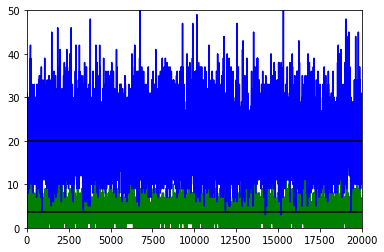

In [39]:
plotBoth('SIR',kappa_list[-1],N_list[-1])

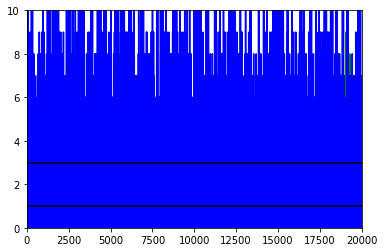

In [42]:
def plotBoth(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    flname2 = 'SI' + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt('.' + datPath + mdl_name + '/' + flname, delimiter=',')
    simdat2 = genfromtxt('.' + datPath + 'SI' + '/' + flname2, delimiter=',')

    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])

    ic_util = np.array([N,0,0])
    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SIR(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)

    ic_util = np.array([0])
    sol2 = solve_ivp(lambda t, y: SI(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-4,
                     rtol = 1e-4)

    plt.plot(simdat[:,0],simdat[:,1],'g-')
    plt.plot(simdat2[:,0],simdat2[:,1],'b-')
    plt.axhline(y=sol1.y[1][-1], color='k', linestyle='-')
    plt.axhline(y=sol2.y[0][-1], color='k', linestyle='-')

#     plt.plot(sol1.t,sol1.y[1], color='k', linestyle='-')
#     plt.plot(sol2.t,sol2.y[0], color='b', linestyle='dashdot')



    plt.axis([0, 20000, 0, 10])




plotBoth('SIR',kappa_list[25],N_list[25])


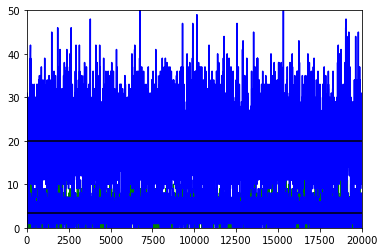

In [70]:
def plotThree(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    flname2 = 'SI' + 'k_keq_' + ku + '_Neq_' +  Nu
    flname3 = 'SEIR' + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt('.' + datPath + mdl_name + '/' + flname, delimiter=',')
    simdat2 = genfromtxt('.' + datPath + 'SI' + '/' + flname2, delimiter=',')
    simdat3 = genfromtxt('.' + datPath + 'SEIR' + '/' + flname3, delimiter=',')

    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])

    ic_util = np.array([N,0,0])
    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SIR(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)

    ic_util = np.array([0])
    sol2 = solve_ivp(lambda t, y: SI(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)
    
    ic_util = np.array([N,0,0,0])
    tend=t_points[-1]
    sol3 = solve_ivp(lambda t, y: SEIR(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)

    plt.plot(simdat[:,0],simdat[:,1],'g-')
    plt.plot(simdat2[:,0],simdat2[:,1],'b-')
    plt.plot(simdat3[:,0],simdat3[:,1],'b-')
    plt.axhline(y=sol1.y[1][-1], color='k', linestyle='-')
    plt.axhline(y=sol2.y[0][-1], color='k', linestyle='-')
    plt.axhline(y=sol3.y[0][-1], color='k', linestyle='-')

#     plt.plot(sol1.t,sol1.y[1], color='k', linestyle='-')
#     plt.plot(sol2.t,sol2.y[0], color='b', linestyle='dashdot')
#     plt.plot(sol3.t,sol3.y[2], color='r', linestyle='dashdot')


    plt.axis([0, 20000, 0, 50])




plotThree('SIR',kappa_list[29],N_list[29])



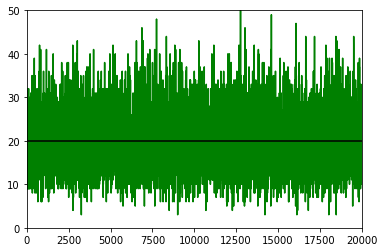

In [73]:
def plotThree(mdl_name,kappa_val,N_val):
    
    kappa = kappa_val
    ku = "%.3E" % kappa
    ku = ku.replace(".","p")
    ku = ku.replace("-","m")
    ku = ku.replace("+","")

    N = N_val
    Nu = "%.3E" % N
    Nu = Nu.replace(".","p")
    Nu = Nu.replace("-","m")
    Nu = Nu.replace("+","")

    flname = mdl_name + 'k_keq_' + ku + '_Neq_' +  Nu
    flname2 = 'SI' + 'k_keq_' + ku + '_Neq_' +  Nu
    flname3 = 'SEIR' + 'k_keq_' + ku + '_Neq_' +  Nu
    # load the sim-data
    simdat = genfromtxt('.' + datPath + mdl_name + '/' + flname, delimiter=',')
    simdat2 = genfromtxt('.' + datPath + 'SI' + '/' + flname2, delimiter=',')
    simdat3 = genfromtxt('.' + datPath + 'SEIR' + '/' + flname3, delimiter=',')

    #
    ##
    ###
    ####
    ###
    ##
    #

    # 
    # mu, beta, kappa, sigma, N
    param = np.array([5e-5, 0.5, kappa, 1, N])

    ic_util = np.array([N,0])
    tend=t_points[-1]
    sol1 = solve_ivp(lambda t, y: SIS(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)

    ic_util = np.array([0])
    sol2 = solve_ivp(lambda t, y: SI(t, y, param),
                     (0, tend),
                     ic_util,
                     method='RK45',
                     t_eval = t_points,
                     atol = 1e-6,
                     rtol = 1e-6)
    
#     ic_util = np.array([N,0,0,0])
#     tend=t_points[-1]
#     sol3 = solve_ivp(lambda t, y: SEIR(t, y, param),
#                      (0, tend),
#                      ic_util,
#                      method='RK45',
#                      t_eval = t_points,
#                      atol = 1e-6,
#                      rtol = 1e-6)

    plt.plot(simdat[:,0],simdat[:,1],'g-')
#     plt.plot(simdat2[:,0],simdat2[:,1],'b-')
#     plt.plot(simdat3[:,0],simdat3[:,1],'b-')
    plt.axhline(y=sol1.y[1][-1], color='k', linestyle='-')
#     plt.axhline(y=sol2.y[0][-1], color='k', linestyle='-')
#     plt.axhline(y=sol3.y[2][-1], color='k', linestyle='-')

#     plt.plot(sol1.t,sol1.y[1], color='k', linestyle='-')
#     plt.plot(sol2.t,sol2.y[0], color='b', linestyle='dashdot')
#     plt.plot(sol3.t,sol3.y[2], color='r', linestyle='dashdot')


    plt.axis([0, 20000, 0, 50])




plotThree('SIS',kappa_list[29],N_list[29])


